# 1. OpenCV-Python
- links : https://docs.opencv.org/4.5.5/
- answers : https://answers.opencv.org/questions/

In [1]:
! pip install opencv-python

In [1]:
import cv2
import numpy as np
import sys

cv2.__version__

'4.5.5'

## 1.1 이미지 읽기
- cv2.imread(file, flag) : 이미지를 읽어들이며 retval은 ndarray로 x, y, 3(rgb)의 shape를 가짐. flag로 색상변경가능.
- 알파채널 등은 IMREAD_UNCHANGED 플래그를 사용해야 함.

In [3]:
img = cv2.imread('./fig/puppy.bmp', flags=cv2.IMREAD_COLOR)
print('dtype :', type(img))
print('image dimension :', img.shape)

dtype : <class 'numpy.ndarray'>
image dimension : (480, 640, 3)


- cv2.namedWindow(name) : 윈도우 이름 입력
- cv2.imshow(name, data) : 이미지를 윈도우 창으로 표출. 
- cv2.waitKey() : 키보드 입력 대기. 과정이 꼬이면 커널 오류가 발생함.
- cv2.destroyAllWindows() : 윈도우 닫음

In [3]:
img = cv2.imread('./fig/puppy.bmp', flags=cv2.IMREAD_GRAYSCALE)

if img is None:
    print('image read failed')
    sys.exit()
    
cv2.namedWindow('image')
cv2.imshow('image', img)

cv2.waitKey()

cv2.destroyAllWindows()

## 1.2 이미지 조정 및 저장
- cv2.imread의 flag 옵션으로 영상 크기를 설정할 수 있음.
- cv2.resize(data, dsize(w,h), interpolation)
    - interpolation : 영역 보간법. 늘릴 때 cv2.INTER_LINEAR, 줄일 때 cv2.INTER_AREA
- cv2.imwrite(fname, img, params=None)

In [18]:
img = cv2.imread('./fig/puppy_1280_853.jpg', flags=cv2.IMREAD_REDUCED_COLOR_2)
print('original shape :', '(853, 1280, 3)')
print('transformed shape :', img.shape)

cv2.namedWindow('image')
cv2.imshow('image', img)

cv2.waitKey()

cv2.destroyAllWindows()

original shape : (853, 1280, 3)
transformed shape : (427, 640, 3)


In [2]:
img = cv2.imread('./fig/puppy.bmp')
print('original shape :', img.shape)

img_re = cv2.resize(img, (320,240), interpolation = cv2.INTER_AREA)
print('transformed shape :', img_re.shape)
    
cv2.namedWindow('image')
cv2.namedWindow('image_re')
cv2.imshow('image', img)
cv2.imshow('image_re', img_re)

cv2.imwrite('./fig/puppy_reduce.bmp', img_re)

cv2.waitKey()

cv2.destroyAllWindows()

original shape : (480, 640, 3)
transformed shape : (240, 320, 3)


## 1.3 윈도우창 조절 및 key 설정
- cv2.namedWindow -> cv2.WINDOW_NORMAL
- cv2.moveWindow
- cv2.waitkey(n) : n milisecond 후 종료. 만약 키를 입력해 종료할 경우 key 값을 ASCII로 반환.

In [15]:
img = cv2.imread('./fig/puppy_1280_853.jpg', cv2.IMREAD_COLOR)

if img is None:
    print('image read failed')
    sys.exit()

# default : cv2.WINDOW_AUTOSIZE
# cv2.WINDOW_NORMAL : 윈도우창 크기 조정가능
cv2.namedWindow('image', cv2.WINDOW_NORMAL)

# 창 생성위치 설정
cv2.moveWindow('image', 300, 100)
cv2.imshow('image', img)

key = cv2.waitKey(3000)
print('press "a" and return :', key)
cv2.destroyAllWindows()

press "a" and return : 97


In [17]:
ord('a'), chr(97)

(97, 'a')

- 특정 키를 누를 때 종료하도록 설정 가능
- ASCII CODE TABLE : https://developer-p.tistory.com/72

In [20]:
img = cv2.imread('./fig/puppy.bmp', cv2.IMREAD_COLOR)

if img is None:
    print('image read failed')
    sys.exit()

cv2.namedWindow('image')
cv2.imshow('image', img)

# press esc or q button
while True:
    key = cv2.waitKey()
    if key == ord('q') or key == 27:
        break

cv2.destroyAllWindows()

## 1.4 matplotlib로 표출
- openCV는 이미지를 bgr로 읽으며 matplotlib은 rgb로 읽음.

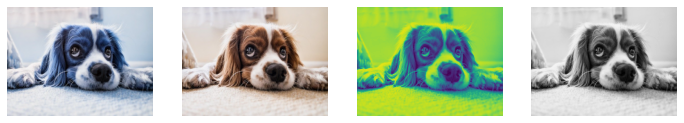

In [10]:
import matplotlib.pyplot as plt

# BGR
img = cv2.imread('./fig/puppy.bmp', cv2.IMREAD_COLOR)

if img is None:
    print('image read failed')
    sys.exit()
    
cv2.namedWindow('image')
cv2.imshow('image',img)

# RGB convert
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize = (12,8))
plt.subplot(141), plt.imshow(img), plt.axis('off')
plt.subplot(142), plt.imshow(imgRGB), plt.axis('off')
plt.subplot(143), plt.imshow(imgGray), plt.axis('off') # gray - pseudo color.
plt.subplot(144), plt.imshow(imgGray, cmap = 'gray'), plt.axis('off')
plt.show()

while True:
    if cv2.waitKey() == 27:
        break
cv2.destroyAllWindows()

## 1.5 window 화면 조정

In [8]:
# 자동 화면전환
import os
img_list = os.listdir('./fig/images/')
print(img_list)

img_path = []
for i in img_list:
    img_path_all = './fig/images/' + i
    img_path.append(img_path_all)

cv2.namedWindow('image')
cv2.setWindowProperty('image', cv2.WND_PROP_FULLSCREEN, cv2.WINDOW_FULLSCREEN)

for i in img_path:
    img = cv2.imread(i, cv2.IMREAD_COLOR)
    cv2.imshow('image', img)
    
    cv2.waitKey(3000)

cv2.destroyAllWindows()

['autumn_forest_park_128379_1920x1080.jpg', 'boat_mountains_lake_135258_1920x1080.jpg', 'forest_fog_trees_128751_1920x1080.jpg', 'pier_dock_sea_dusk_shore_118549_1920x1080.jpg', 'road_marking_evening_clouds_horizon_120298_1920x1080.jpg']


In [7]:
# ver.무한동력
import glob
img_list = glob.glob('./fig/images/*.jpg')

cv2.namedWindow('image')
cv2.setWindowProperty('image', cv2.WND_PROP_FULLSCREEN, cv2.WINDOW_FULLSCREEN)
idx = 0

while True:
    img_name = img_path[idx]
    img = cv2.imread(img_name, cv2.IMREAD_COLOR)
    
    cv2.imshow('image', img)
    
    key = cv2.waitKey(2000)
    if key == 27:
        break
    
    idx +=1
    if idx == 4:
        idx = 0
        
    
cv2.destroyAllWindows()